In [238]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [225]:
def cluster(img, K=8):
#     Z = img.reshape((-1,3))
    Z = img.reshape((-1))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

    return res2, label

In [269]:
img_bg = cv2.imread('BG.jpg')
img_1 = cv2.imread('1.jpg')

img_bg = cv2.medianBlur(img_bg, 5)
img_1 = cv2.medianBlur(img_1, 5)

img_bg_hsv = cv2.cvtColor(img_bg, cv2.COLOR_BGR2HSV)
img_1_hsv = cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV)

K = 6

(480, 640) (307200, 1)


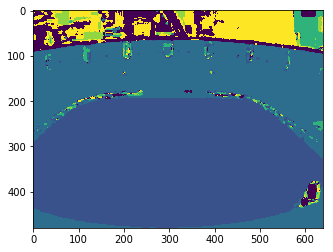

In [270]:
img_bg_clust, label_bg = cluster(img_bg_hsv[:,:,0], K)
img_bg_clust_label = np.zeros(img_bg_clust.shape, dtype=np.uint8)
label_bg_shaped = label_bg.reshape(img_bg_clust.shape)

plt.imshow(img_bg_clust)
print(img_bg_clust.shape, label_bg.shape)

# img_bg_hsv = cv2.cvtColor(img_bg_clust, cv2.COLOR_BGR2HSV)
# img_1_hsv = cv2.cvtColor(img_1_clust, cv2.COLOR_BGR2HSV)

In [271]:
dst = []
for label_val in range(K):
    bg_hist = cv2.calcHist([img_bg_hsv[:,:,0][label_bg_shaped==label_val]], [0], None, [180], [0, 180])
    dst.append(cv2.calcBackProject([img_1_hsv[:,:,0]], [0], bg_hist, [0, 180], 1))

C:\Users\konstgo\PycharmProjects\cvcourse\venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


[[-inf -inf -inf ...   0.   0.   0.]
 [-inf -inf -inf ...   0.   0.   0.]
 [-inf -inf -inf ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]
[[  0.   0.   0. ... -inf -inf -inf]
 [  0.   0.   0. ... -inf -inf -inf]
 [

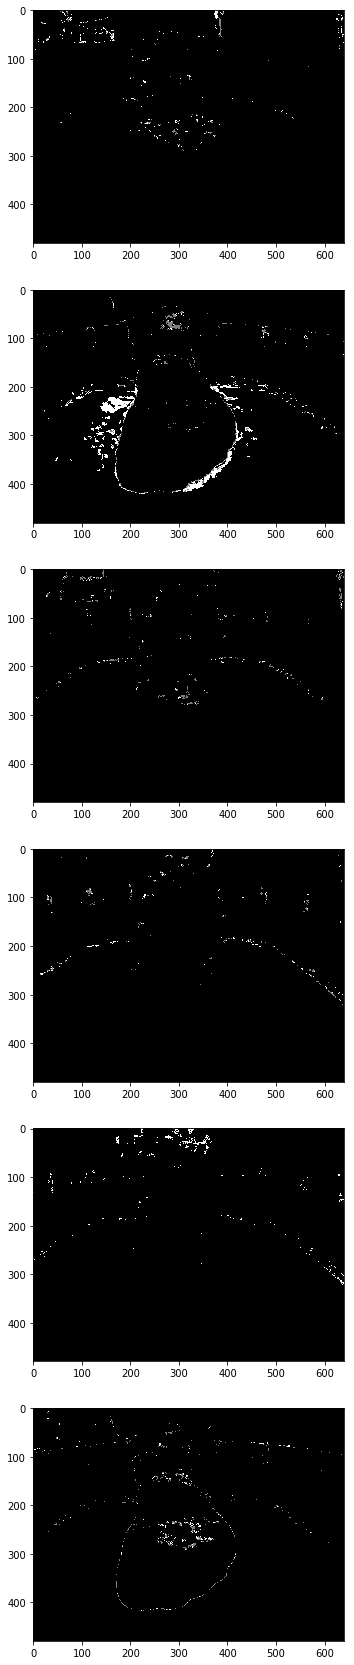

In [275]:
fig, ax = plt.subplots(nrows=K, ncols=1, figsize=(30, 30))
for i in range(K):
    dst_log = np.log10(1+dst[i])
    
    ax[i].imshow(np.uint8(dst_log), cmap='gray')

In [143]:
# calculating object histogram
bg_hist = cv2.calcHist([img_bg_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
# normalize histogram and apply backprojection
# cv2.normalize(bg_hist, bg_hist, 0, 255, cv2.NORM_MINMAX)
dst = cv2.calcBackProject([img_1_hsv], [0, 1], bg_hist, [0, 180, 0, 256], 1)
# Now convolute with circular disc
# disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# cv2.filter2D(dst, -1, disc, dst)
# # threshold and binary AND
# ret,thresh = cv2.threshold(dst,50,255,0)
# thresh = cv2.merge((thresh,thresh,thresh))
# res = cv2.bitwise_and(target,thresh)

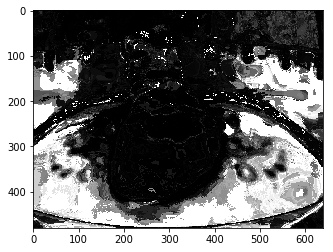

In [144]:
# print(dst)
# print(np.log10(1+dst))
# dst = np.log10(1+dst)
plt.imshow(np.uint8(dst), cmap='gray')

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


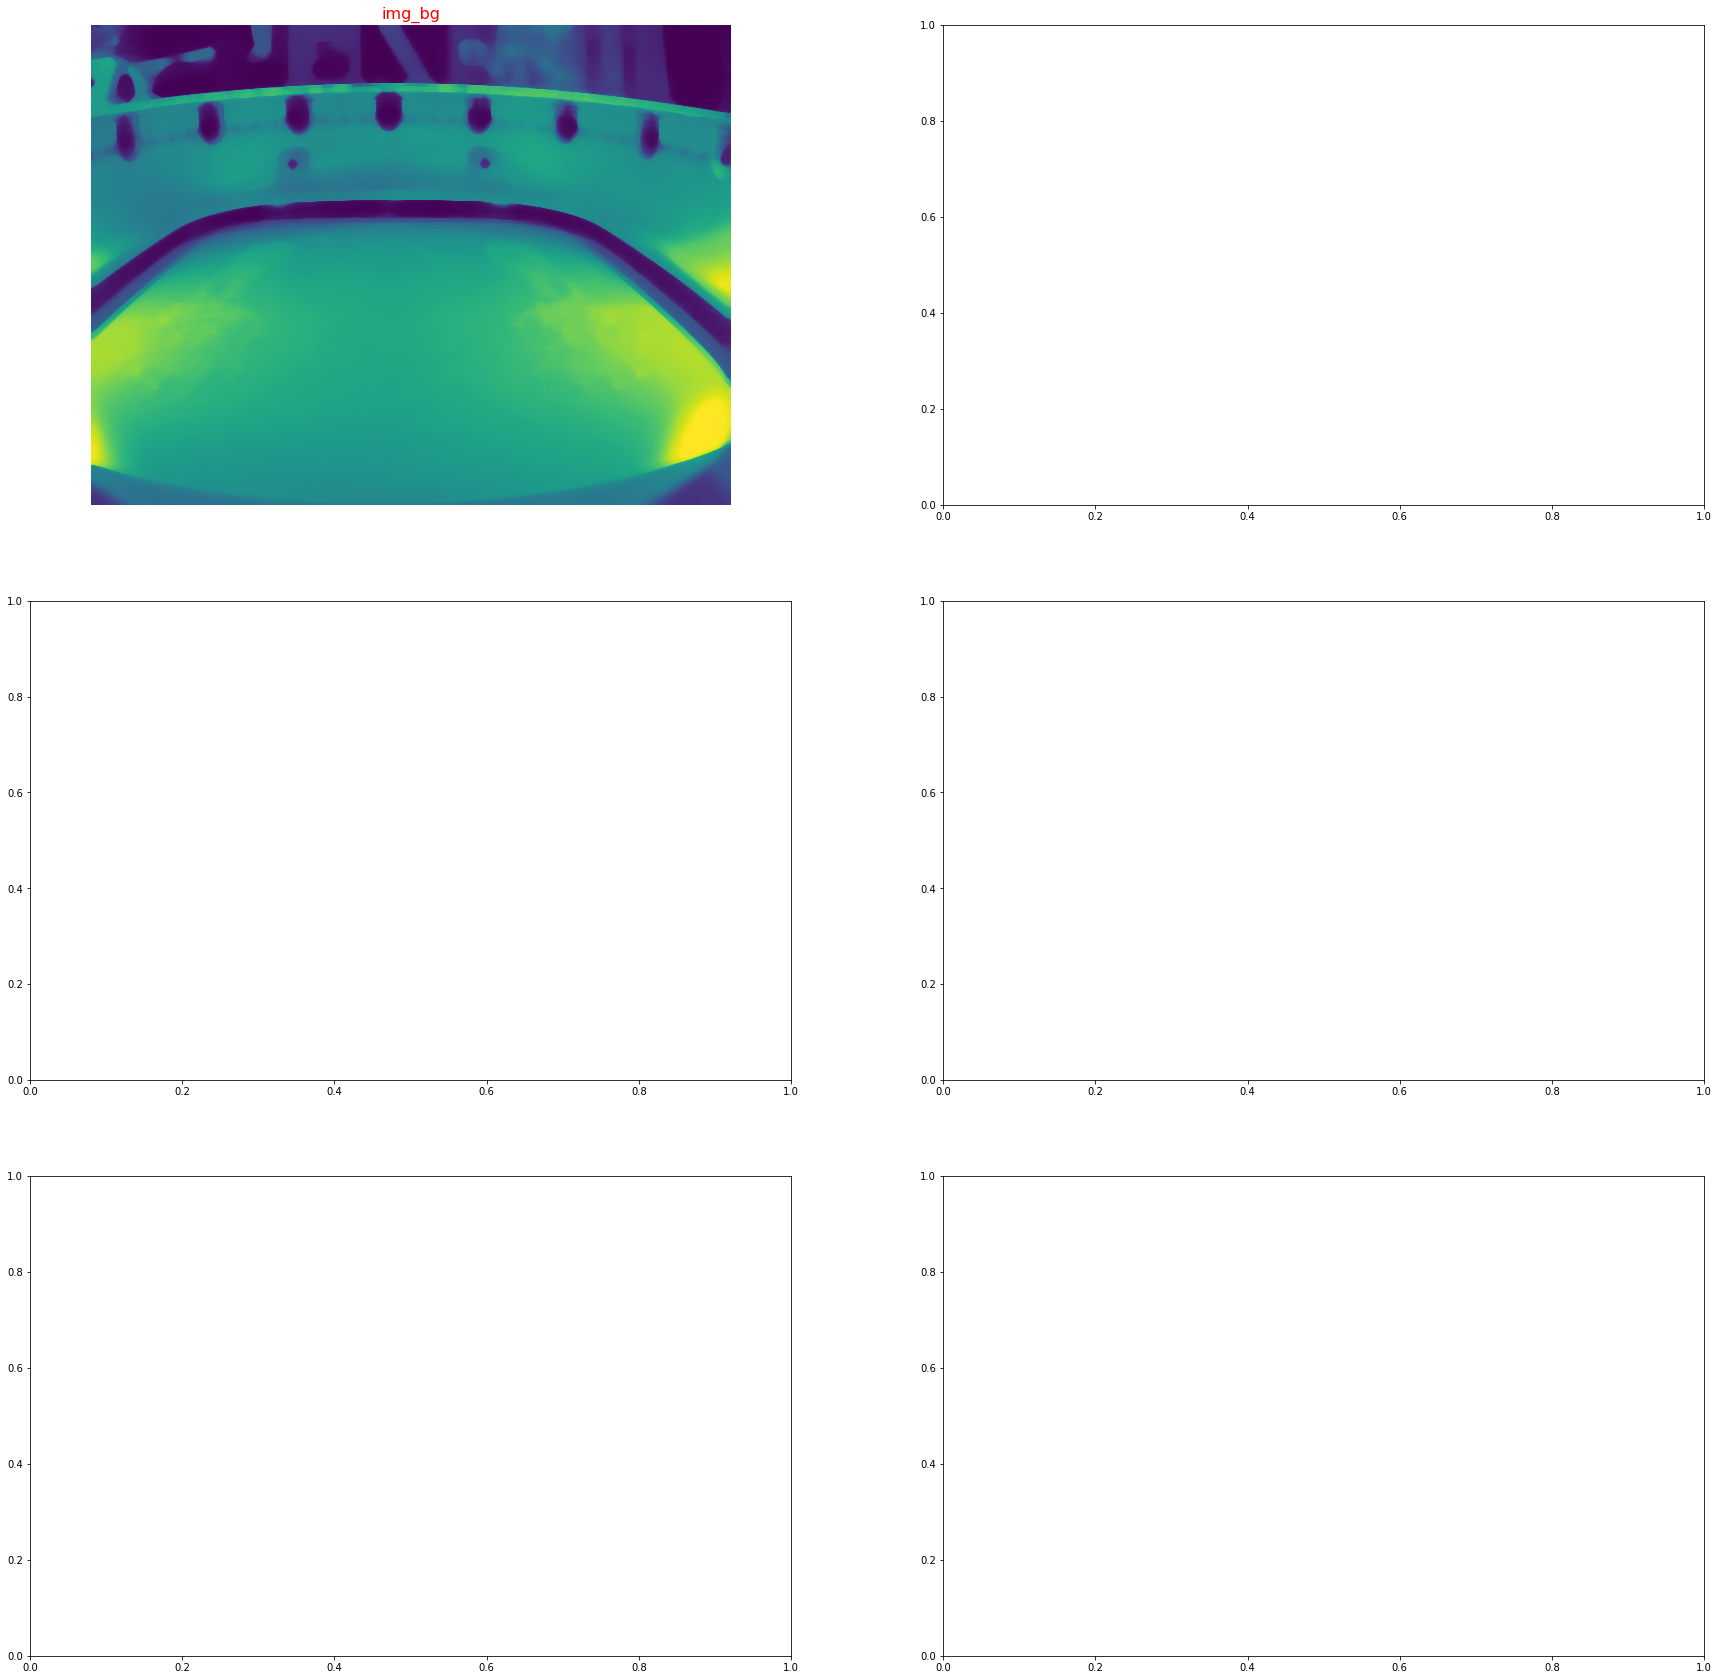

In [169]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))
img_bg_rgb = cv2.cvtColor(img_bg, cv2.COLOR_BGR2GRAY)
ax[0][0].set_axis_off()
ax[0][0].set_title('img_bg', fontsize=16, color="red")
ax[0][0].imshow(img_bg_rgb)

img_bg_clust_rgb = cv2.cvtColor(img_bg_clust, cv2.COLOR_BGR2GRAY)
ax[0][1].set_axis_off()
ax[0][1].set_title('img_bg_clust', fontsize=16, color="red")
ax[0][1].imshow(img_bg_clust_rgb)

img_1_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
ax[1][0].set_axis_off()
ax[1][0].set_title('img_1', fontsize=16, color="red")
ax[1][0].imshow(img_1_rgb)

img_1_clust_rgb = cv2.cvtColor(img_1_clust, cv2.COLOR_BGR2GRAY)
ax[1][1].set_axis_off()
ax[1][1].set_title('img_1_clust', fontsize=16, color="red")
ax[1][1].imshow(img_1_clust_rgb)

diff_rgb = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
ax[2][0].set_axis_off()
ax[2][0].set_title('diff', fontsize=16, color="red")
ax[2][0].imshow(diff)

plt.show()